<a href="https://colab.research.google.com/github/tk2093/Machine_Learning/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
train_data = pd.read_csv("train.csv")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


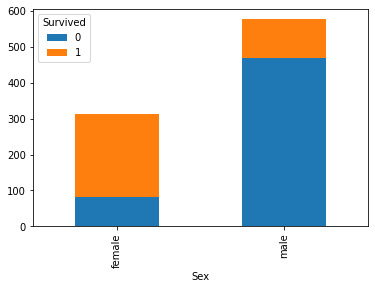

In [3]:
pd.crosstab(index = train_data['Sex'], columns = train_data['Survived']).plot(kind='bar', stacked=True)
plt.show()

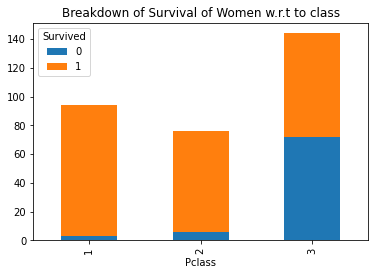

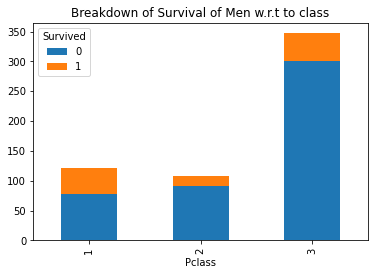

In [4]:
#plt.subplot(1, 2, 1) # row 1, col 2 index 1

pd.crosstab(index = train_data[train_data['Sex']=='female']['Pclass'], columns = train_data['Survived']).plot(kind='bar', stacked=True)
plt.title("Breakdown of Survival of Women w.r.t to class")
#plt.subplot(1, 2, 2) # row 1, col 2 index 1
pd.crosstab(index = train_data[train_data['Sex']=='male']['Pclass'], columns = train_data['Survived']).plot(kind='bar', stacked=True)
plt.title("Breakdown of Survival of Men w.r.t to class")
plt.show()

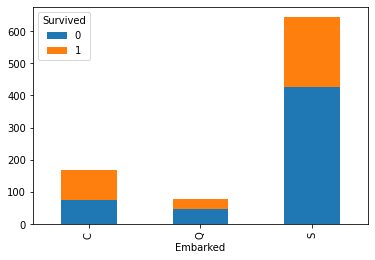

In [5]:
pd.crosstab(index = train_data['Embarked'], columns = train_data['Survived']).plot(kind='bar', stacked=True)
plt.show()

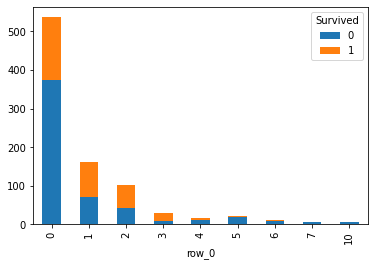

In [6]:
pd.crosstab(index = train_data['SibSp']+train_data['Parch'], columns = train_data['Survived']).plot(kind='bar', stacked=True)
plt.show()

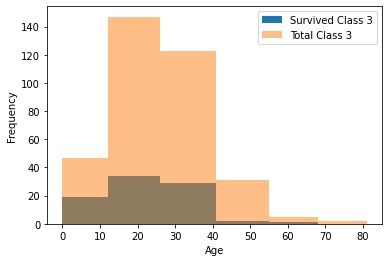

In [7]:
train_data[(train_data['Survived']==1) & (train_data['Pclass'] == 3)]['Age'].plot(kind='hist',bins=[0,12,26,41,55,68,81], label='Survived Class 3')
train_data[(train_data['Pclass'] == 3)]['Age'].plot(kind='hist',bins=[0,12,26,41,55,68,81], alpha=0.5, label='Total Class 3')
plt.xlabel('Age')
plt.legend()
plt.show()

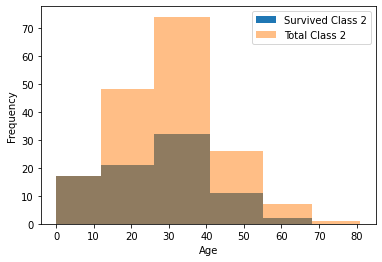

In [8]:
train_data[(train_data['Survived']==1) & (train_data['Pclass'] == 2)]['Age'].plot(kind='hist',bins=[0,12,26,41,55,68,81], label='Survived Class 2')
train_data[(train_data['Pclass'] == 2)]['Age'].plot(kind='hist',bins=[0,12,26,41,55,68,81], alpha=0.5, label='Total Class 2')
plt.xlabel('Age')
plt.legend()
plt.show()

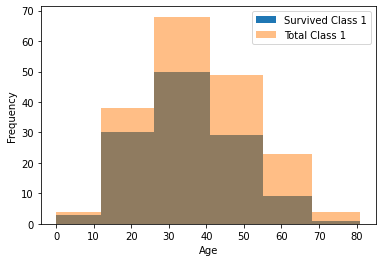

In [9]:
train_data[(train_data['Survived']==1) & (train_data['Pclass'] == 1)]['Age'].plot(kind='hist',bins=[0,12,26,41,55,68,81], label='Survived Class 1')
train_data[(train_data['Pclass'] == 1)]['Age'].plot(kind='hist',bins=[0,12,26,41,55,68,81], alpha=0.5, label='Total Class 1')
plt.xlabel('Age')
plt.legend()
plt.show()

In [67]:
train_data['Relatives'] = train_data['SibSp']+train_data['Parch']

train_data['Singlepass'] = train_data['Relatives'].apply(lambda x: 0 if x>0 else 1)

In [68]:
train_data['Age']= train_data['Age'].groupby([train_data['Sex'], train_data['Pclass']]).apply((lambda x: x.fillna(x.mean())))
#age_range ={range(0, 12): 0, range(12, 26): 1, range(26, 41): 2, range(41, 55): 3, range(55, 68): 4, range(68, 81): 5}
train_data['Age'] = pd.cut(train_data['Age'], bins=[0,12,26,41,55,68,81], labels = [0, 1, 2, 3, 4, 5]).astype(int)

In [21]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [69]:
train_data['Fare'] = pd.cut(train_data['Fare'], bins=[0,8,15,32,514], labels = [0, 1, 2, 3], include_lowest = True).astype(int)

In [70]:
train_data['Embarked'].fillna('S', inplace = True)
train_data['Embarked'] = train_data['Embarked'].map({'S':0, 'C':1,  'Q':2}).astype(int)

In [72]:
train_data['Sex'].replace({'female':0,'male':1}, inplace=True)

In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
X = train_data.loc[:, train_data.columns != 'Survived']
y = train_data[['Survived']].values
y = y.reshape(y.shape[0],)
#X[(X['Age'].isna()) & (X['Name'].str.contains('Master'))] = X.loc[(X['Age'].isna()) & (X['Name'].str.contains('Master'))].replace({np.nan:5})
X = X[X.columns[~X.columns.isin(['Cabin','Ticket','Name','PassengerId'])]]
X['Sex'].replace({'female':0,'male':1}, inplace=True)
X['Age']= X['Age'].groupby([X['Sex'], X['Pclass']]).apply((lambda x: x.fillna(x.mean())))   #https://trenton3983.github.io/files/titanic.html#Age
X['Relatives'] = X['SibSp']+X['Parch']
X['Singlepass'] = X['Relatives'].apply(lambda x: 0 if x>0 else 1)
X['Age'] = pd.cut(X['Age'], bins=[0,12,26,41,55,68,81], labels = [0, 1, 2, 3, 4, 5]).astype(int)
X['Fare']= X['Fare'].groupby([X['Fare'], X['Pclass']]).apply((lambda x: x.fillna(x.mean())))
X['Fare'] = pd.cut(X['Fare'], bins=[0,8,15,32,514], labels = [0, 1, 2, 3], include_lowest = True).astype(int)
X['Embarked'].fillna('S', inplace = True)
X['Embarked'] = X['Embarked'].map({'S':0, 'C':1,  'Q':2}).astype(int)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      891 non-null    int64   
 1   Sex         891 non-null    int64   
 2   Age         891 non-null    category
 3   SibSp       891 non-null    int64   
 4   Parch       891 non-null    int64   
 5   Fare        891 non-null    category
 6   Embarked    891 non-null    int64   
 7   Relatives   891 non-null    int64   
 8   Singlepass  891 non-null    int64   
dtypes: category(2), int64(7)
memory usage: 51.0 KB


In [ ]:
#X.loc[(X['Age']/X['Age'].round(0) != 1) & (~X['Age'].isna()) & (X['Age'] >=1)]['Age'] = X.loc[(X['Age']/X['Age'].round(0) != 1) & (~X['Age'].isna()) & (X['Age'] >=1)]['Age'].apply(np.floor)

In [6]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Singlepass
0,3,1,1,1,0,0,0,1,0
1,1,0,2,1,0,3,1,1,0
2,3,0,1,0,0,0,0,0,1
3,1,0,2,1,0,3,0,1,0
4,3,1,2,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,2,0,0,1,0,0,1
887,1,0,1,0,0,2,0,0,1
888,3,0,1,1,2,2,0,3,0
889,1,1,1,0,0,2,1,0,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=0)

In [ ]:
#sc= StandardScaler()
#X_train.iloc[:,:2] = sc.fit_transform(X_train.iloc[:,:2])
#X_test.iloc[:,:2] = sc.transform(X_test.iloc[:,:2])

In [ ]:
#sc= StandardScaler()
#X[X.columns.difference(['PassengerId'])] = sc.fit_transform(X[X.columns.difference(['PassengerId'])])


In [8]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 80.44692737430168


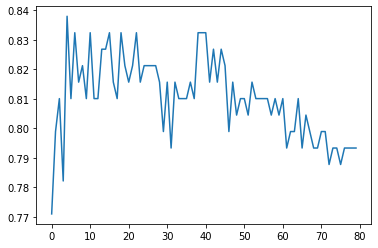

In [9]:
acc = []
for i in range(1,81):
  knn = KNeighborsClassifier(n_neighbors=i)

#scores = cross_val_score(knn, X, y, cv=5)
#print("Cross-validation scores: {}".format(scores))
#print("Average cross-validation score: {:.2f}".format(scores.mean()))
#print()
  knn.fit(X_train, y_train)
  acc.append(knn.score(X_test, y_test))
plt.plot(acc)
#rint("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
#print()
knn.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Cross-validation scores: [0.78212291 0.78651685 0.84831461 0.80898876 0.79213483]
Average cross-validation score: 0.80
Test set accuracy: 0.84


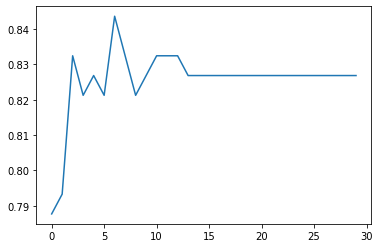

In [15]:
acc_ree= []
for i in range(1,31):
  ree = DecisionTreeClassifier(random_state=0, max_depth=i)
  ree = ree.fit(X_train, y_train)
  acc_ree.append(ree.score(X_test, y_test))
plt.plot(acc_ree)

In [18]:
ree = DecisionTreeClassifier(random_state=0, max_depth=7)
ree = ree.fit(X_train, y_train)
ree.score(X_test, y_test)

0.8435754189944135

In [19]:
lgc = LogisticRegression()
clf = lgc.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8156424581005587

In [47]:
X2 = pd.read_csv("test.csv")
X2 = X2[X2.columns[~X2.columns.isin(['Cabin','Ticket','Name'])]]
X2['Sex'].replace({'female':0,'male':1}, inplace=True)
X2['Age']= X['Age'].groupby([X['Sex'], X['Pclass']]).apply((lambda x: x.fillna(x.mean())))   #https://trenton3983.github.io/files/titanic.html#Age
X2['Relatives'] = X2['SibSp']+X2['Parch']
X2['Singlepass'] = X2['Relatives'].apply(lambda x: 0 if x>0 else 1)
X2['Age'] = pd.cut(X2['Age'], bins=[0,12,26,41,55,68,81], labels = [0, 1, 2, 3, 4, 5])
#X2['Fare']= X2['Fare'].groupby([X2['Fare'], X2['Pclass']]).apply((lambda x: x.fillna(x.mean())))
#X2['Fare'] = pd.cut(X2['Fare'], bins=[0,8,15,32,514], labels = [0, 1, 2, 3], include_lowest = True)
X2['Embarked'].fillna('S', inplace = True)
X2['Embarked'] = X2['Embarked'].map({'S':0, 'C':1,  'Q':2}).astype(int)


In [48]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   Age          418 non-null    category
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         417 non-null    category
 7   Embarked     418 non-null    int64   
 8   Relatives    418 non-null    int64   
 9   Singlepass   418 non-null    int64   
dtypes: category(2), int64(8)
memory usage: 27.5 KB


In [ ]:
#knn.predict(X2[X2.columns.difference(['PassengerId'])])
y_pred = clf.predict(X2[X2.columns.difference(['PassengerId'])])

In [ ]:
sub = pd.DataFrame({"PassengerId":X2['PassengerId'],
                    'Survived':y_pred})
sub.to_csv('submission.csv', index=False)

In [ ]:
## Change age float to int
## change age which are like 0.xx another column, because they all survived
## averge age is different for different class due to accumulation of wealth over time. Older people have more wealth than younger people.

In [36]:
rdc = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=1) #6, 14
rdc.fit(X_train, y_train)
#rdc.fit(X[X.columns.difference(['PassengerId'])].values, y)
rdc.score(X_test, y_test)

0.8491620111731844

In [63]:
X2

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Singlepass
0,892,3,1,2,0,0,0,2,0,1
1,893,3,0,3,1,0,0,0,1,0
2,894,2,1,4,0,0,1,2,0,1
3,895,3,1,2,0,0,1,0,0,1
4,896,3,0,1,1,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1,0,0,1,0,0,1
414,1306,1,0,2,0,0,3,1,0,1
415,1307,3,1,2,0,0,0,0,0,1
416,1308,3,1,1,0,0,1,0,0,1


In [56]:
X2_copy = X2.drop('PassengerId', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [61]:
y_pred = ree.predict(X2_copy)
sub = pd.DataFrame({"PassengerId":X2['PassengerId'],
                    'Survived':y_pred})
sub.to_csv('submission.csv', index=False)

In [64]:
from xgboost import XGBClassifier

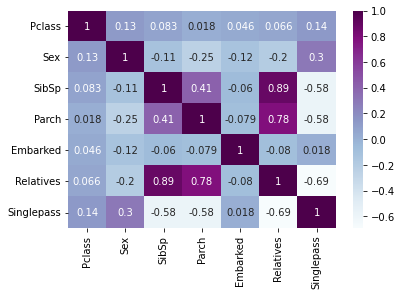

In [65]:
sns.heatmap(X.corr(),annot = True,cmap = "BuPu");

In [66]:
X_copy = X.drop('Relatives', axis = 1)

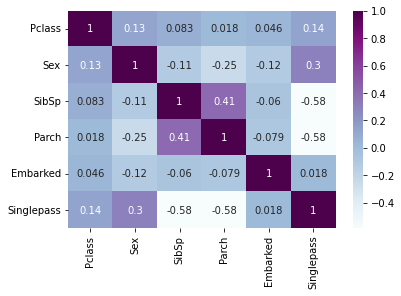

In [68]:
sns.heatmap(X_copy.corr(),annot = True,cmap = "BuPu");

In [69]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_copy, y, test_size= 0.20, random_state=0)

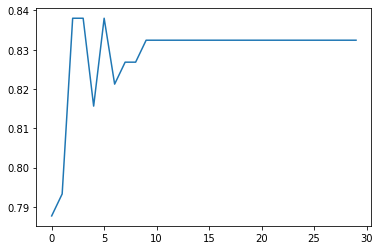

In [71]:
acc_ree= []
for i in range(1,31):
  ree = DecisionTreeClassifier(random_state=0, max_depth=i)
  ree = ree.fit(X_train1, y_train1)
  acc_ree.append(ree.score(X_test1, y_test1))
plt.plot(acc_ree)

In [83]:
rdc = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf = 3, random_state=42) #6, 14
rdc.fit(X_train1, y_train1)
#rdc.fit(X[X.columns.difference(['PassengerId'])].values, y)
rdc.score(X_test1, y_test1)

0.8156424581005587

In [79]:
X2_copy2 = X2_copy.drop('Relatives', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [81]:
X2_copy2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Singlepass
0,3,1,2,0,0,0,2,1
1,3,0,3,1,0,0,0,0
2,2,1,4,0,0,1,2,1
3,3,1,2,0,0,1,0,1
4,3,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...
413,3,1,1,0,0,1,0,1
414,1,0,2,0,0,3,1,1
415,3,1,2,0,0,0,0,1
416,3,1,1,0,0,1,0,1


In [84]:
## To Use

y_pred = rdc.predict(X2_copy2)
sub = pd.DataFrame({"PassengerId":X2['PassengerId'],
                    'Survived':y_pred})
sub.to_csv('submission.csv', index=False)

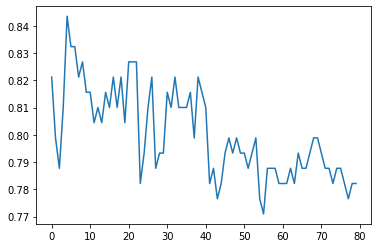

In [85]:
acc = []
for i in range(1,81):
  knn = KNeighborsClassifier(n_neighbors=i)

#scores = cross_val_score(knn, X, y, cv=5)
#print("Cross-validation scores: {}".format(scores))
#print("Average cross-validation score: {:.2f}".format(scores.mean()))
#print()
  knn.fit(X_train1, y_train1)
  acc.append(knn.score(X_test1, y_test1))
plt.plot(acc)
#rint("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

In [93]:
knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
#print()
knn.fit(X_train1, y_train1)
print("Test set accuracy: {:.2f}".format(knn.score(X_test1, y_test1)))

Cross-validation scores: [0.78212291 0.78651685 0.84831461 0.80898876 0.79213483]
Average cross-validation score: 0.80
Test set accuracy: 0.84
